In [53]:
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [35]:
# import tensorflow as tf
# IMAGE_SIZE=256
# BATCH_SIZE=12
# datasets = tf.keras.preprocessing.image_dataset_from_directory(
#     "E:\PLD_3_Classes_256\rice_leaf_diseases",
#     seed=123,
#     shuffle=True,
#     image_size=(IMAGE_SIZE,IMAGE_SIZE),
#      batch_size=BATCH_SIZE
# )

# # (trainx,_),(_,_)=load_data()


In [54]:

import tensorflow as tf

In [55]:
import tensorflow as tf
l=[]
for i in range(24):
    path = "E:\PLD_3_Classes_256\Training\Healthy\Healthy_"+str(i+1)+".jpg"
    Load_image = np.asarray(tf.keras.preprocessing.image.load_img(path))
    l.append(Load_image)

In [56]:

l=np.asarray(l)
l.shape[0]

24

IndexError: index 24 is out of bounds for axis 0 with size 24

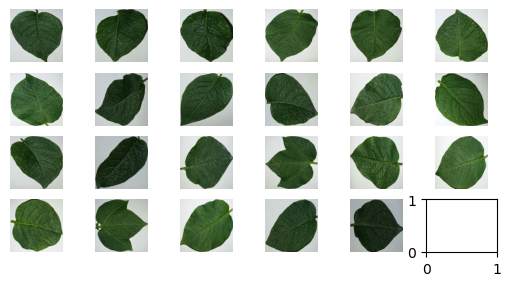

In [57]:
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(l[i+1])
    plt.axis('off')


In [58]:
def def_discriminator(in_shape=(256,256,3)):
    model=tf.keras.models.Sequential()
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1,activation='sigmoid'))
    
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['accuracy'])
    return model

In [59]:
t1=def_discriminator()
t1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 128, 128, 128)     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)     

In [60]:
def def_generator(noise=100):
    model=Sequential()
    model.add(Dense(8192,input_dim=noise))
    model.add(Reshape((8,8,128)))
    
    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(3,(8,8),activation='tanh',padding='same'))
    
    return model
    

In [61]:
t2=def_generator()
t2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8192)              827392    
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_25 (Conv2D  (None, 16, 16, 128)      147584    
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_26 (Conv2D  (None, 32, 32, 128)      147584    
 Transpose)                                                      
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 32, 32, 128)     

In [62]:
def def_gan(gen,dis):
    dis.trainable=False
    
    model=Sequential()
    model.add(gen)
    model.add(dis)
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt)
    
    return model

In [63]:
def load_real_samples():
#     (train_x,_),(_,_)=load_data()
    
    x=l.astype('float32')
    x=(x-127.5)/127.5
    return x

In [64]:
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    y=ones((n_samples,1))
    return x,y 

# n_samples is the batch size

In [65]:
def generate_latent_points(lat_dim,n_samples):
    x_input=randn(lat_dim * n_samples)
    x_input=x_input.reshape(n_samples,lat_dim)
    y=ones((n_samples,1))
    
    return x_input



In [66]:
def generate_fake_samples(generator,lat_dim,n_samples):
    x_input=generate_latent_points(lat_dim,n_samples)
    x=generator.predict(x_input)
    y=zeros((n_samples,1))
    
    return x,y

In [67]:
def train(g_model,d_model,gan_model,dataset,lat_dim,n_epochs=20,n_batch=10):    #epochs=100
    bat_per_epoch=int(dataset.shape[0]/n_batch)
    half_batch=int(n_batch/2)
    
    for i in range(n_epochs):
        for j in range(bat_per_epoch):
            x_real,y_real=generate_real_samples(dataset,half_batch)
            d_loss_real,_=d_model.train_on_batch(x_real,y_real)
            x_fake,y_fake=generate_fake_samples(g_model,lat_dim,half_batch)
            d_loss_fake,_=d_model.train_on_batch(x_fake,y_fake)
    
            x_gan=generate_latent_points(lat_dim,n_batch)
            y_gan=ones((n_batch,1))
    
            g_loss=gan_model.train_on_batch(x_gan,y_gan)
        
            print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epoch, d_loss_real, d_loss_fake, g_loss))  
    
    #g_model.save(f'E:\cifar_generator_epochs1.h5')
    g_model.save(f'E:\models\potatoleaf2.h5')
    

In [68]:
lat_dim=100

discriminator=def_discriminator()
generator=def_generator(lat_dim)

gan_model=def_gan(generator,discriminator)

dataset=load_real_samples()
dataset.shape[0]

train(generator,discriminator,gan_model,dataset,lat_dim,n_epochs=2)

1/1 [==============================] - 1s 972ms/step
Epoch>1, Batch 1/2, d1=0.682, d2=0.695 g=0.692
1/1 [==============================] - 1s 797ms/step
Epoch>1, Batch 2/2, d1=0.548, d2=0.696 g=0.692
1/1 [==============================] - 1s 906ms/step
Epoch>2, Batch 1/2, d1=0.396, d2=0.698 g=0.691
1/1 [==============================] - 1s 783ms/step
Epoch>2, Batch 2/2, d1=0.195, d2=0.702 g=0.690


In [30]:
import tensorflow as tf
# model1=tf.keras.models.load_model("E:/models/rice_generator_epochs1.h5")
model1=tf.keras.models.load_model("E:\models\potatoleaf1.h5")
#model1=tf.keras.models.load_model("E:/models/rice_generator_epochs1.h5")

In [31]:
from keras.models import load_model
from numpy.random import randn


def show_plot(examples,n):
  for i in range(n):
    plt.subplot(n,n,1+i)
    plt.axis('off')
    plt.imshow(examples[i])
    plt.show()

1/1 [==============================] - 4s 4s/step


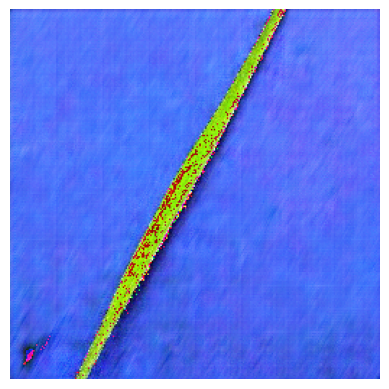

In [25]:
latent_points=generate_latent_points(100,25)

x1=model1.predict(latent_points)

# x1=(x1+1)/2.0

import numpy as np
x1=(x1*255).astype(np.uint8)
#plt.imshow(x1)
show_plot(x1,1)

1/1 [==============================] - 4s 4s/step


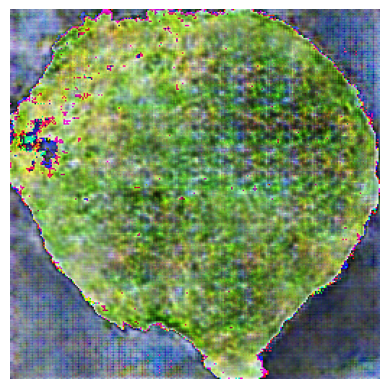

In [32]:
latent_points=generate_latent_points(100,25)

x1=model1.predict(latent_points)

# x1=(x1+1)/2.0

import numpy as np
x1=(x1*255).astype(np.uint8)
#plt.imshow(x1)
show_plot(x1,1)